MANJIT SINGH T117

PRACTICAL NO 7

Aim : Logistic Regression and Decision Tree
* Build a logistic regression model to predict a binary outcome.
* Evaluate the model's performance using classification metrics (e.g., accuracy, precision, recall).
* Construct a decision tree model and interpret the decision rules for classification.

## **Logistic Regression**


In [112]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc
)

sns.set(style="whitegrid")


In [113]:
import pandas as pd
# 2. Load Dataset
data_path = "bank.csv"

# The bank.csv file in this environment appears to be comma-separated.
# Explicitly specifying sep=',' to ensure correct parsing.
df = pd.read_csv(data_path, sep=",")

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [114]:
# 3. Encode Categorical Variables and Prepare X, y
label_encoders = {}

df_encoded = df.copy() # Create a copy to store encoded data

for col in df_encoded.columns:
    if df_encoded[col].dtype == "object":
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

# Define X and y from the fully encoded DataFrame
X = df_encoded.drop("deposit", axis=1)
y = df_encoded["deposit"]

print("Encoded DataFrame Head:")
print(df_encoded.head())
print("\nUnique values in 'deposit' after encoding:", y.unique())

Encoded DataFrame Head:
   age  job  marital  education  default  balance  housing  loan  contact  \
0   59    0        1          1        0     2343        1     0        2   
1   56    0        1          1        0       45        0     0        2   
2   41    9        1          1        0     1270        1     0        2   
3   55    7        1          1        0     2476        1     0        2   
4   54    0        1          2        0      184        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  deposit  
0    5      8      1042         1     -1         0         3        1  
1    5      8      1467         1     -1         0         3        1  
2    5      8      1389         1     -1         0         3        1  
3    5      8       579         1     -1         0         3        1  
4    5      8       673         2     -1         0         3        1  

Unique values in 'deposit' after encoding: [1 0]


In [115]:
# 4. Feature Scaling (for Logistic Regression) - X is already encoded

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Scale X which is already encoded

In [116]:
# 5. Split the Dataset into Training and Testing Set
#    80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y            # keeps class ratio same in train and test
)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)



Training set shape: (8929, 16)
Testing set shape: (2233, 16)


In [117]:
# 6. Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [118]:
# 5. Split the Dataset into Training and Testing Set
#    80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y            # keeps class ratio same in train and test
)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (8929, 16)
Testing set shape: (2233, 16)


In [119]:
# 6. Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [120]:
# 7. Build and Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [121]:
# 8. Make Predictions on Test Data
y_pred = log_reg.predict(X_test_scaled)

In [122]:
# 9. Evaluate Model Performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy  :", round(accuracy, 4))
print("Precision :", round(precision, 4))
print("Recall    :", round(recall, 4))
print("F1-score  :", round(f1, 4))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy  : 0.7971
Precision : 0.7957
Recall    : 0.7694
F1-score  : 0.7823

Confusion Matrix:
[[966 209]
 [244 814]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1175
           1       0.80      0.77      0.78      1058

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233



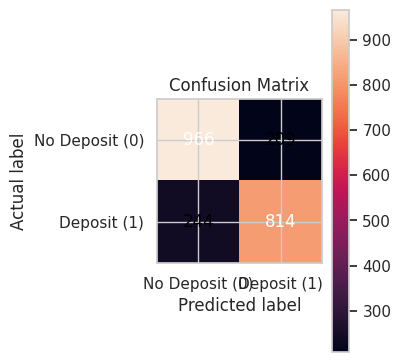

In [123]:
# 10. Plot Confusion Matrix
plt.figure(figsize=(4, 4))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['No Deposit (0)', 'Deposit (1)'])
plt.yticks(tick_marks, ['No Deposit (0)', 'Deposit (1)'])

# Add text inside each box
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

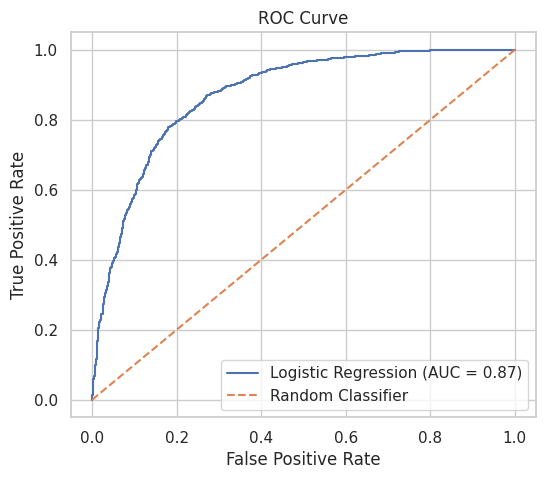

In [124]:
# 11. ROC Curve and AUC
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]  # probability of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

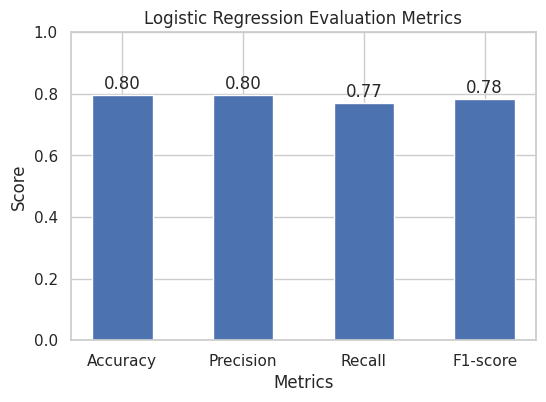

In [125]:
# 12. Bar Plot of Evaluation Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, width=0.5)
plt.ylim(0, 1)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Logistic Regression Evaluation Metrics")
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()

In [126]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, criterion='gini')
clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(random_state=0)

In [127]:
from sklearn.metrics import accuracy_score
import math
predictions_test = clf.predict(X_test)
print("Accuracy (Test) : ", accuracy_score(y_test, predictions_test) * 100)

Accuracy (Test) :  78.6386027765338


In [128]:
predictions_train = clf.predict(X_train)
print("Accuracy (Train) : ", accuracy_score(y_train, predictions_train) * 100)

Accuracy (Train) :  100.0


Visualizing the Decision Tree

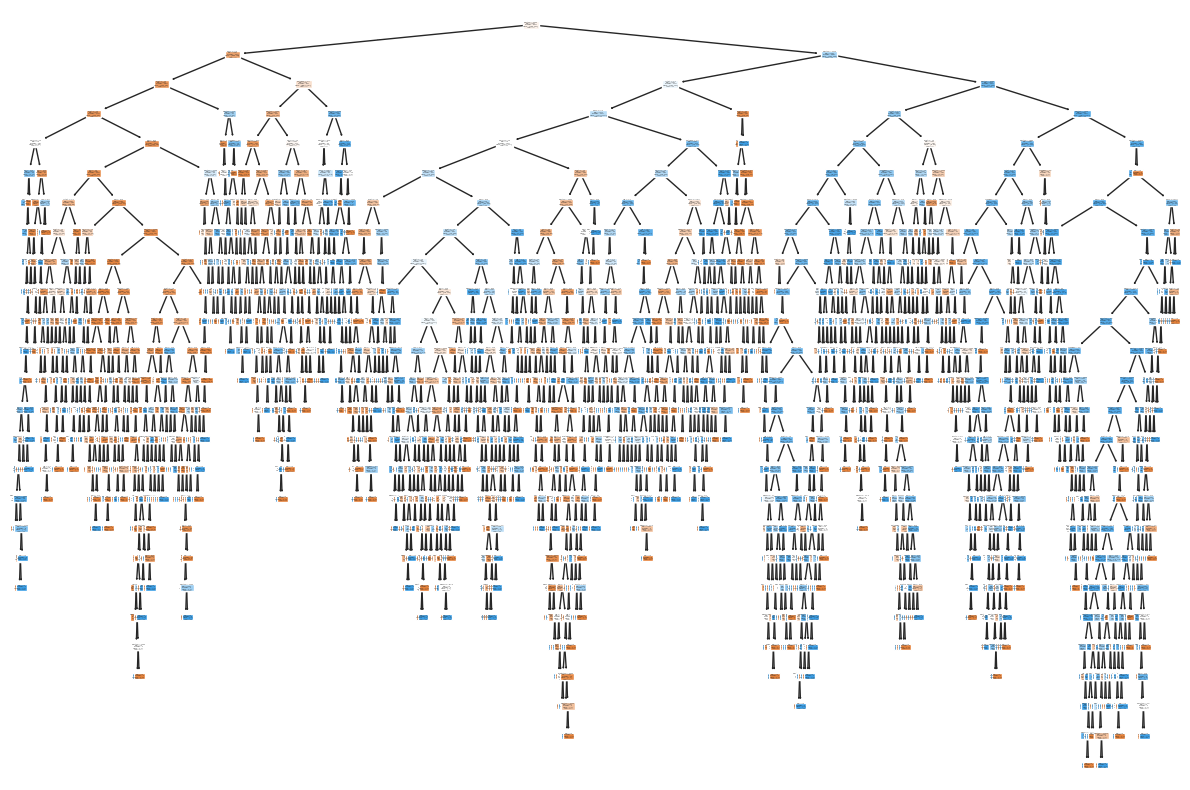

In [129]:
from sklearn import tree
plt.figure(figsize=(15, 10))
# Assuming 'no' is 0 and 'yes' is 1 after LabelEncoding 'deposit'
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['no', 'yes'])
plt.show()

Evaluating our test dataset


In [130]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report (Test):")
print(classification_report(y_test, predictions_test))

print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, predictions_test))

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1175
           1       0.79      0.75      0.77      1058

    accuracy                           0.79      2233
   macro avg       0.79      0.78      0.79      2233
weighted avg       0.79      0.79      0.79      2233

Confusion Matrix (Test):
[[967 208]
 [269 789]]


Evaluating our training dataset

In [131]:
print("Classification Report (Train):")
print(classification_report(y_train, predictions_train))

print("Confusion Matrix (Train):")
print(confusion_matrix(y_train, predictions_train))

Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4698
           1       1.00      1.00      1.00      4231

    accuracy                           1.00      8929
   macro avg       1.00      1.00      1.00      8929
weighted avg       1.00      1.00      1.00      8929

Confusion Matrix (Train):
[[4698    0]
 [   0 4231]]


Finding false positive rate and true positive rate

In [132]:
from sklearn.metrics import roc_curve, roc_auc_score
dt_probs = clf.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)
print("FPR :", fpr_dt)
print("TPR :", tpr_dt)
print("Thresholds :", thresholds_dt)

FPR : [0.         0.17702128 1.        ]
TPR : [0.         0.74574669 1.        ]
Thresholds : [inf  1.  0.]


Plotting ROC curve for our Decision Tree

AUC Score : 0.7843627076378555


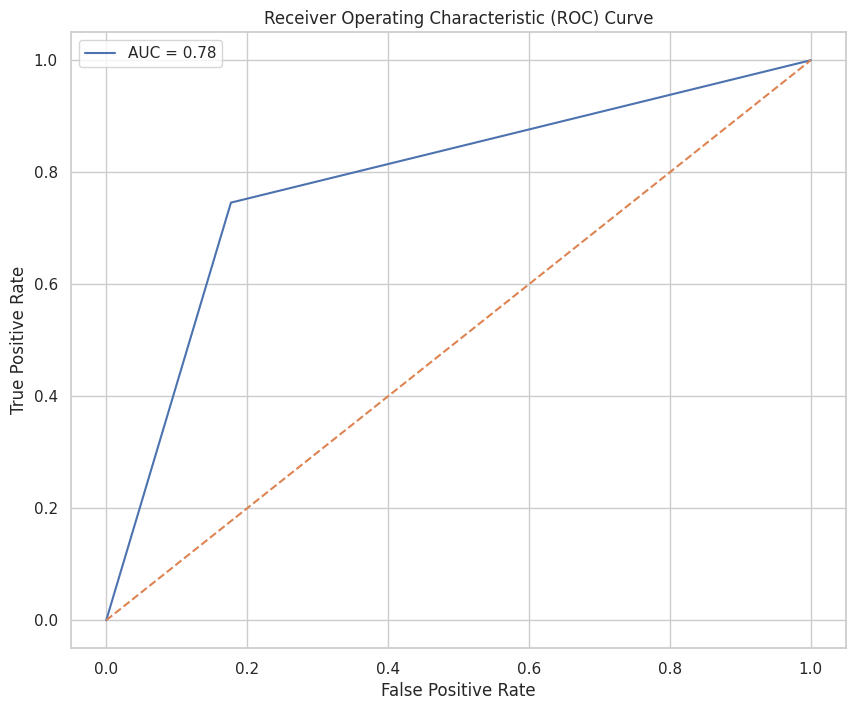

In [133]:
from sklearn.metrics import auc # Ensure auc is imported
auc_score_dt = auc(fpr_dt, tpr_dt)
print("AUC Score :", auc_score_dt)

def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10, 8))
    plt.plot(fpr_dt, tpr_dt, label='AUC = %0.2f' % auc_score_dt)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr_dt, tpr_dt)

In [134]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Visualizing alpha w.r.t impurity of leaves

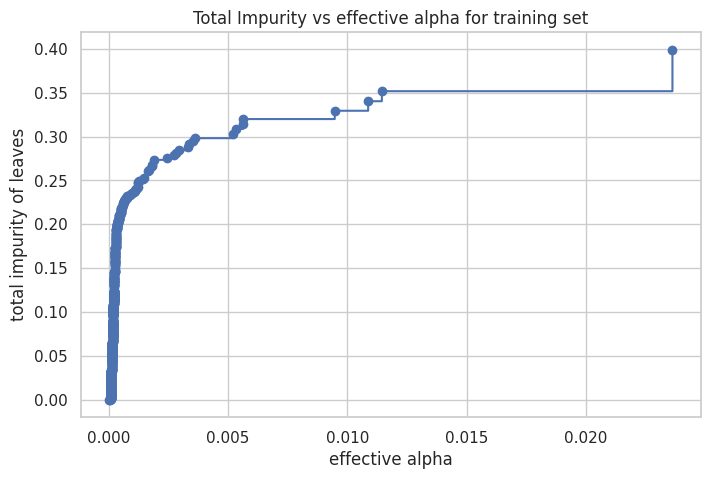

In [135]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [136]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf_temp = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_temp.fit(X_train, y_train)
    clfs.append(clf_temp)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
    clfs[-1].tree_.node_count, ccp_alphas[-1]))
# Removing the last tree (single node)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

Number of nodes in the last tree is: 1 with ccp_alpha: 0.09965027322400294


Nodes and depth vs alpha

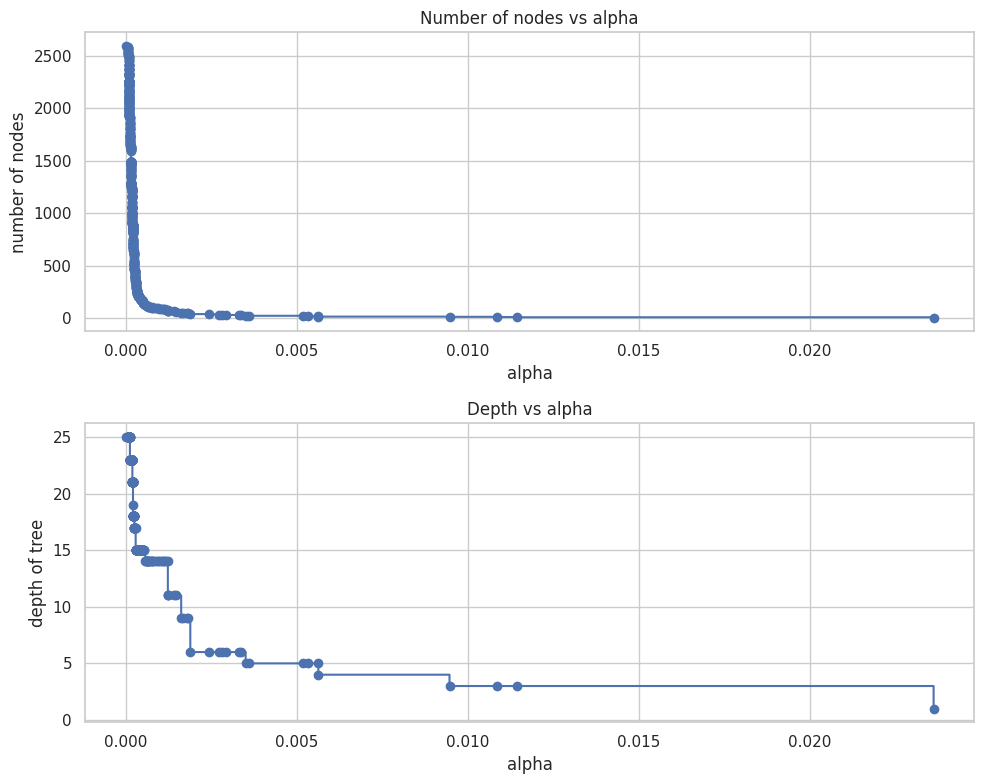

In [137]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
plt.show()

Accuracy vs alpha

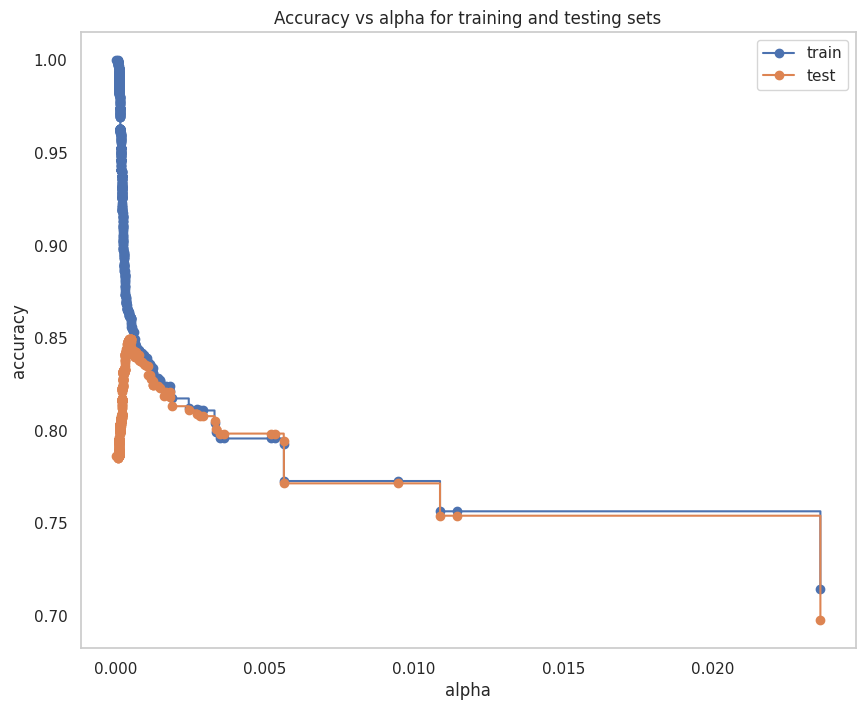

In [138]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

In [139]:
# -----------------------------
# (Choose an alpha from the plot where test accuracy is reasonable
# and overfitting is reduced. Example: 0.016 – you can change this
# based on your plot.)
# -----------------------------
clf_pruned = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
clf_pruned.fit(X_train, y_train)
clf_pruned

DecisionTreeClassifier(ccp_alpha=0.016, random_state=0)

In [140]:
pred_pruned_test = clf_pruned.predict(X_test)
accuracy_score(y_test, pred_pruned_test)

0.7541424093148231

In [141]:
pred_pruned_train = clf_pruned.predict(X_train)
accuracy_score(y_train, pred_pruned_train)

0.7565236868630306

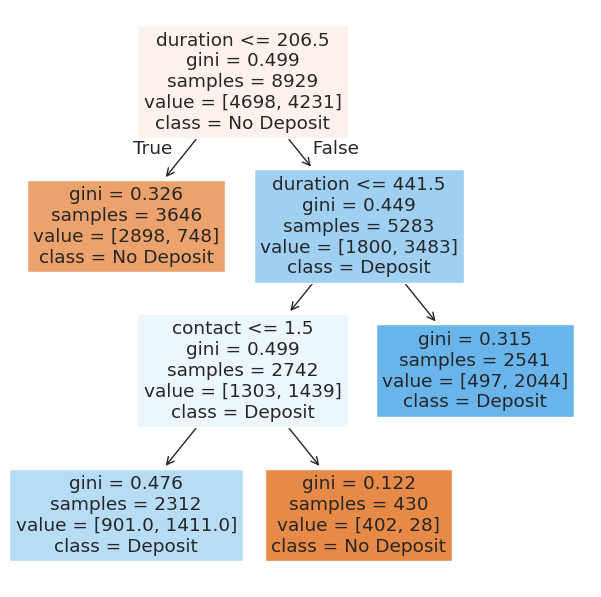

In [142]:
from sklearn import tree
plt.figure(figsize=(7.5, 7.5))
tree.plot_tree(clf_pruned, filled=True, feature_names=X.columns, class_names=['No Deposit', 'Deposit'])
plt.show()